In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pretrained model on ImageNet
from tensorflow import keras

base_model = keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Freeze base model
base_model.trainable = False


In [ ]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = keras.layers.Dense(85, activation = 'softmax')(x)


# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 85)                108885    
                                                                 
Total params: 2,366,869
Trainable params: 108,885
Non-trainable params: 2,257,984
_________________________________________________________________


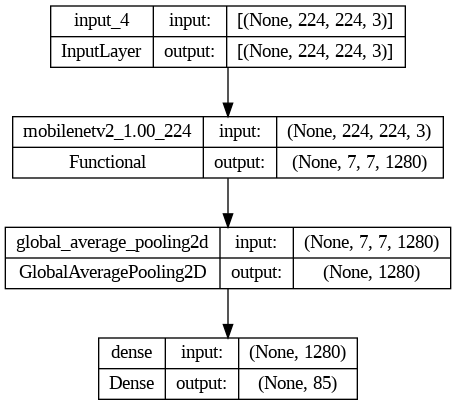

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# compile the model with loss and metrics options
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#Augment the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # randomnly flip images

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/train', 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/trafficsigns/test', 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


Epoch 1/15
138/138 [==============================] - 3352s 24s/step - loss: 2.7988 - accuracy: 0.2974 - val_loss: 2.2241 - val_accuracy: 0.3944
Epoch 2/15
138/138 [==============================] - 451s 3s/step - loss: 1.8484 - accuracy: 0.4754 - val_loss: 2.0119 - val_accuracy: 0.4363
Epoch 3/15
138/138 [==============================] - 454s 3s/step - loss: 1.5831 - accuracy: 0.5390 - val_loss: 1.8114 - val_accuracy: 0.4992
Epoch 4/15
138/138 [==============================] - 455s 3s/step - loss: 1.4455 - accuracy: 0.5613 - val_loss: 1.7226 - val_accuracy: 0.5225
Epoch 5/15
138/138 [==============================] - 432s 3s/step - loss: 1.3577 - accuracy: 0.5895 - val_loss: 1.6837 - val_accuracy: 0.5427
Epoch 6/15
138/138 [==============================] - 431s 3s/step - loss: 1.2549 - accuracy: 0.6275 - val_loss: 1.6840 - val_accuracy: 0.5318
Epoch 7/15
138/138 [==============================] - 441s 3s/step - loss: 1.1909 - accuracy: 0.6345 - val_loss: 1.6077 - val_accuracy: 0.55

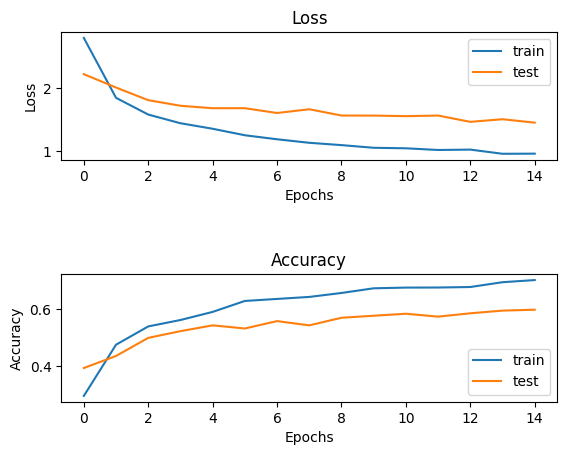

In [ ]:
history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/32,
          validation_steps=valid_it.samples/32,
          epochs=15)

import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
import pickle

pickle_location = 'traffic.pickle'
with open(pickle_location, 'wb') as file_pi:
  pickle.dump(history, file_pi, protocol=pickle.HIGHEST_PROTOCOL)
  print("History saved to file: %s" % pickle_location)

NameError: ignored